# 1 - Beginner - Single Module Example

This tutorial shows how to assign an array of irradiances as inputs to a module. It is assigning 12 values of irradiances Gpoat, 1 value to each row of six cells in a 12 x 6 module (72 cell module). 

In [1]:
import pvmismatch  # this imports everything we need
import numpy as np
import seaborn as sns
import pandas as pd

#### Inputs

In [2]:
## Inputs:
numcells = 72
Gpoat = [0.9, 0.9, 0.8, 0.7, 0.7, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9] # kW/m2 units
portraitorlandscape = 'portrait'

#### Select module type

The stdpl matrix shows the placement of the cells in the module. The modules we are using are the standard PVMismatch modules, look at the references for the bypass diode groups, but because of this it does matter if the module is in ladscape or portrait.

In [3]:
# cell placement for 'portrait'.
if numcells == 72:
    stdpl=np.array([[0,	23,	24,	47,	48,	71],
    [1,	22,	25,	46,	49,	70],
    [2,	21,	26,	45,	50,	69],
    [3,	20,	27,	44,	51,	68],
    [4,	19,	28,	43,	52,	67],
    [5,	18,	29,	42,	53,	66],
    [6,	17,	30,	41,	54,	65],
    [7,	16,	31,	40,	55,	64],
    [8,	15,	32,	39,	56,	63],
    [9,	14,	33,	38,	57,	62],
    [10,	13,	34,	37,	58,	61],
    [11,	12,	35,	36,	59,	60]])

elif numcells == 96:
    stdpl=np.array([[0,	23,	24,	47,	48,	71,	72,	95],
        [1,	22,	25,	46,	49,	70,	73,	94],
        [2,	21,	26,	45,	50,	69,	74,	93],
        [3,	20,	27,	44,	51,	68,	75,	92],
        [4,	19,	28,	43,	52,	67,	76,	91],
        [5,	18,	29,	42,	53,	66,	77,	90],
        [6,	17,	30,	41,	54,	65,	78,	89],
        [7,	16,	31,	40,	55,	64,	79,	88],
        [8,	15,	32,	39,	56,	63,	80,	87],
        [9,	14,	33,	38,	57,	62,	81,	86],
        [10,	13,	34,	37,	58,	61,	82,	85],
        [11,	12,	35,	36,	59,	60,	83,	84]])

if portraitorlandscape == 'landscape':
    stdpl = stdpl.transpose()

cellsx = len(stdpl[1]); cellsy = len(stdpl)
    




#### Let's create the type of module we want

In [4]:
if cellsx*cellsy == 72:
    cell_pos = pvmismatch.pvmismatch_lib.pvmodule.STD72
elif cellsx*cellsy == 96:
    cell_pos = pvmismatch.pvmismatch_lib.pvmodule.STD96

pvmod=pvmismatch.pvmismatch_lib.pvmodule.PVmodule(cell_pos=cell_pos)


#### Let's make the system be just 1 module

In [5]:
pvsys = pvmismatch.pvsystem.PVsystem(numberStrs=1, numberMods=1, pvmods=pvmod)  


#### Create the pattern of irradiance based on the Gpoat input. 

We are assigning the gradient across the module for this case. 

This is how our irradiance gradient looks accross the module


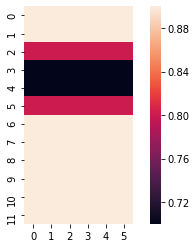

In [6]:
G=np.array([Gpoat]).transpose()
H = np.ones([1,cellsx]) 
array_det = np.dot(G,H) 
sns.heatmap(array_det, square = True)
print("This is how our irradiance gradient looks accross the module")


#### Values under STC:

This is under the default irradiance of 1000 W/m2

Pmp: 240.948027 [W], Eff: 21.825477 [%], FF: 78.726054 [%]
Imp: 5.915269 [A], Vmp: 40.733234 [V], Isc: 6.305600 [A], Voc: 48.537622 [V]


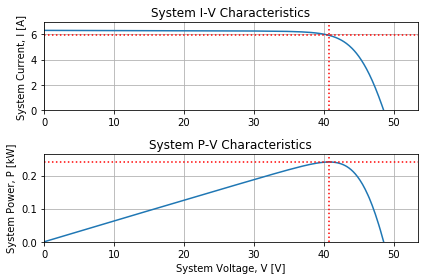

In [7]:
pvsys.plotSys()   
print ("Pmp: %f [W], Eff: %f [%%], FF: %f [%%]" % (pvsys.Pmp, pvsys.eff * 100., pvsys.FF * 100.))
print ("Imp: %f [A], Vmp: %f [V], Isc: %f [A], Voc: %f [V]" % (pvsys.Imp, pvsys.Vmp, pvsys.Isc, pvsys.Voc))


#### Values with our irradiance profile:

Pmp: 183.658038 [W], Eff: 19.571828 [%], FF: 80.869192 [%]
Imp: 4.310297 [A], Vmp: 42.609142 [V], Isc: 4.710711 [A], Voc: 48.210363 [V]


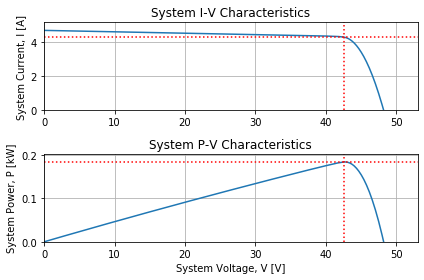

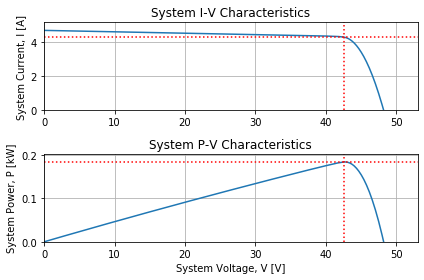

In [8]:
pvsys.setSuns({0: {0: [array_det, stdpl]}})
print ("Pmp: %f [W], Eff: %f [%%], FF: %f [%%]" % (pvsys.Pmp, pvsys.eff * 100., pvsys.FF * 100.))
print ("Imp: %f [A], Vmp: %f [V], Isc: %f [A], Voc: %f [V]" % (pvsys.Imp, pvsys.Vmp, pvsys.Isc, pvsys.Voc))
PowerDetailed=pvsys.Pmp  
pvsys.plotSys()      



### Calculating Mismatch

The power derate, or Mismatch resulting from the module having a distribution of irradiances compared to just one single average irradiance value can be calculated by repeating the power calculation, now with the average irradiance assigned to the whole module, and then calculating the Mismatch: 

#### First let's calculate the average irradiance value

In [9]:
array_avg = np.ones([cellsy,cellsx])*np.mean(Gpoat)        
averageIrradiance = array_avg.mean()
print(" The module's average irradiance is : %f [kW/m2]", averageIrradiance)
print(" And each cell will see this value of irradiance: ")
print (array_avg)

 The module's average irradiance is : %f [kW/m2] 0.8499999999999999
 And each cell will see this value of irradiance: 
[[0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]
 [0.85 0.85 0.85 0.85 0.85 0.85]]


#### Let's assign the averaged irradiance array to the cells and calculate power.

There's various ways, but they all do the same.

Setting each cell:

Pmp: 204.012466 [W], Eff: 21.740932 [%], FF: 78.938784 [%]
Imp: 5.019300 [A], Vmp: 40.645602 [V], Isc: 5.359760 [A], Voc: 48.219306 [V]


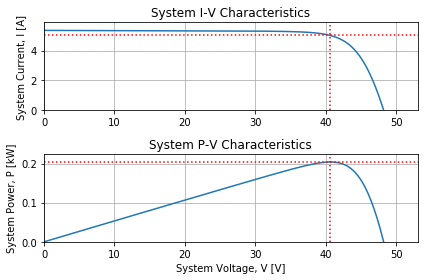

In [10]:
pvsys.setSuns({0: {0: [array_avg, stdpl]}})  # Sets each cell
pvsys.plotSys()                         
print ("Pmp: %f [W], Eff: %f [%%], FF: %f [%%]" % (pvsys.Pmp, pvsys.eff * 100., pvsys.FF * 100.))
print ("Imp: %f [A], Vmp: %f [V], Isc: %f [A], Voc: %f [V]" % (pvsys.Imp, pvsys.Vmp, pvsys.Isc, pvsys.Voc))


Setting the Module: 

Pmp: 204.012466 [W], Eff: 21.740932 [%], FF: 78.938784 [%]
Imp: 5.019300 [A], Vmp: 40.645602 [V], Isc: 5.359760 [A], Voc: 48.219306 [V]


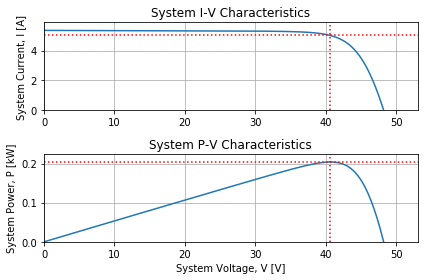

In [11]:
pvsys.setSuns({0: {0: averageIrradiance}})   # Sets the module
pvsys.plotSys()                         
print ("Pmp: %f [W], Eff: %f [%%], FF: %f [%%]" % (pvsys.Pmp, pvsys.eff * 100., pvsys.FF * 100.))
print ("Imp: %f [A], Vmp: %f [V], Isc: %f [A], Voc: %f [V]" % (pvsys.Imp, pvsys.Vmp, pvsys.Isc, pvsys.Voc))

Setting the whole system (in this case is just 1 module):

Pmp: 204.012466 [W], Eff: 21.740932 [%], FF: 78.938784 [%]
Imp: 5.019300 [A], Vmp: 40.645602 [V], Isc: 5.359760 [A], Voc: 48.219306 [V]


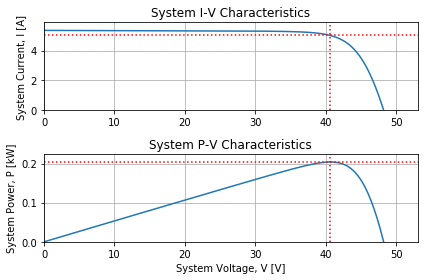

In [12]:
pvsys.setSuns(averageIrradiance) # Sets the whole system
pvsys.plotSys()                         
print ("Pmp: %f [W], Eff: %f [%%], FF: %f [%%]" % (pvsys.Pmp, pvsys.eff * 100., pvsys.FF * 100.))
print ("Imp: %f [A], Vmp: %f [V], Isc: %f [A], Voc: %f [V]" % (pvsys.Imp, pvsys.Vmp, pvsys.Isc, pvsys.Voc))


As you can see, there are various ways to "setSuns". Some of them are described in the setSuns function:
(https://github.com/SunPower/PVMismatch/blob/master/pvmismatch/pvmismatch_lib/pvsystem.py)


This are the examples/options:
<ul>
<li> Ee={0: {0: {'cells': (0, 1, 2), 'Ee': (0.9, 0.3, 0.5)}}} </li>
<li> Ee=0.91  # set all modules in all strings to 0.91 suns </li>
<li> Ee={12: 0.77}  # set all modules in string with index 12 to 0.77 suns </li>
<li> Ee={3: {8: 0.23, 7: 0.45}}  # set module with index 8 to 0.23 suns and module with index 7 to 0.45 suns in string with index 3 </li>
    </ul>

##### Calculate the mismatch

Now we have the power under average irradiance conditions, and we can calculate mismatch

In [13]:
PowerAveraged=pvsys.Pmp  # This is the "Ideal"

In [14]:
Mismatch = (1 - PowerDetailed/PowerAveraged)
print( " Electrical mismatch (power derate) is %f %%" % (Mismatch*100))

 Electrical mismatch (power derate) is 9.977051 %
